In [1]:
import pandas as pd
import pyfolio as pf
import empyrical as ep
import matplotlib.pyplot as plt
from openbb_terminal.sdk import openbb
from datetime import datetime

c:\Users\chadc\anaconda3\envs\quant-stack\lib\site-packages\openbb_terminal\stocks\options\tmx_model.py:52: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  options_listings = pd.read_html(r.text)


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

In [2]:
perf = pd.read_pickle("strat_perf.pickle")

In [3]:
bt_returns, bt_positions, bt_transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
print(bt_returns.head()) 
print(bt_returns.index.min() - pd.Timedelta(days=5))

2010-01-04 00:00:00+00:00    0.000000
2010-01-05 00:00:00+00:00   -0.000072
2010-01-06 00:00:00+00:00   -0.000060
2010-01-07 00:00:00+00:00   -0.011918
2010-01-08 00:00:00+00:00    0.016708
Name: returns, dtype: float64
2009-12-30 00:00:00+00:00


In [4]:
# Load data using the OpenBB SDK. Note we start 5 calendar
# days prior to our backest start date
# Assuming `start_date` is a pandas Timestamp or datetime object
start_date = bt_returns.index.min()
start_date_naive = start_date.replace(tzinfo=None)

# Now use the updated `start_date_naive` in your function call
data = openbb.stocks.load(
    "QQQ",
    start_date=start_date_naive - pd.Timedelta(days=5),
    end_date=bt_returns.index.max(),
)

# Compute the returns, coerce to UTC, and extract the
# rows that align with our backtest
benchmark_rets = (
    data["Adj Close"]
    .pct_change()
    .tz_localize("UTC")
    .loc[bt_returns.index]
)

Loading Daily data for QQQ with starting period 2009-12-30.

In [14]:
print(f"The Sharpe Ratio of the backtest is: {ep.sharpe_ratio(bt_returns)}")

The Sharpe Ratio of the backtest is: 1.138097814020907


In [16]:
print(f"The market beta of the backtest is: {ep.beta(bt_returns, benchmark_rets)}")

The market beta of the backtest is: 0.407769778930124


In [15]:
print(f"The maximum drawdown of the backtest is: {ep.max_drawdown(bt_returns)}")

The maximum drawdown of the backtest is: -0.3507439075783508


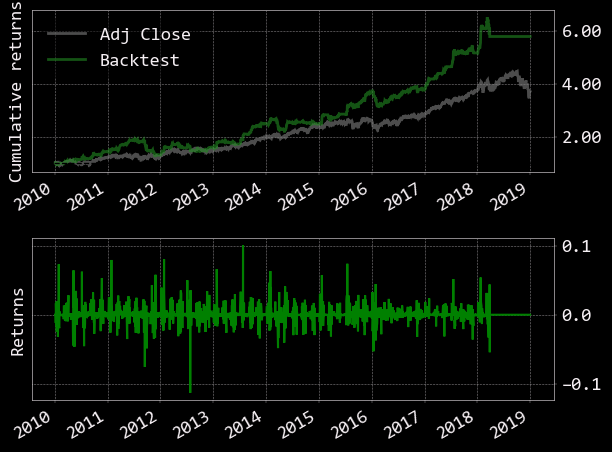

In [17]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

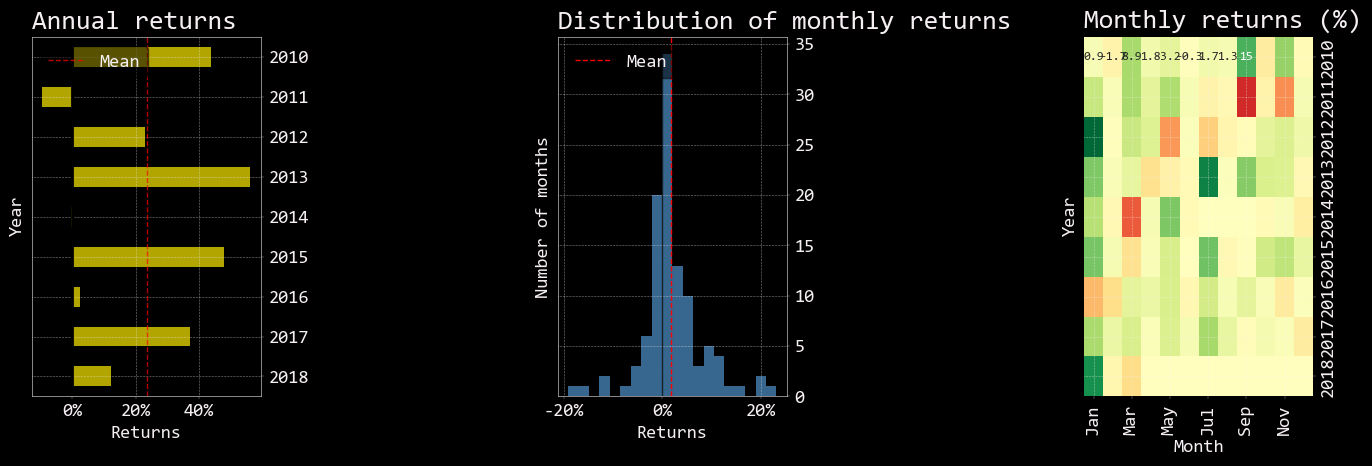

In [18]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

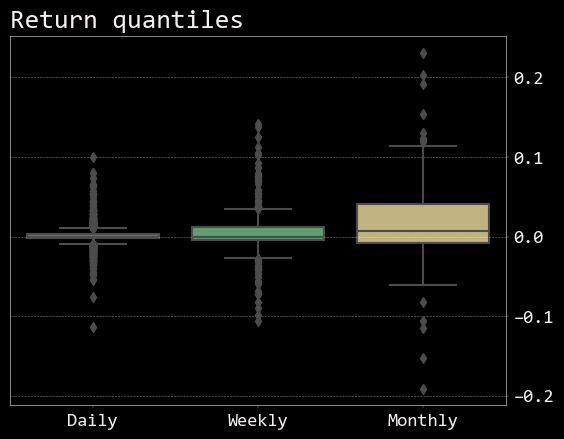

In [19]:
# Return Quantiles
pf.plot_return_quantiles(bt_returns);

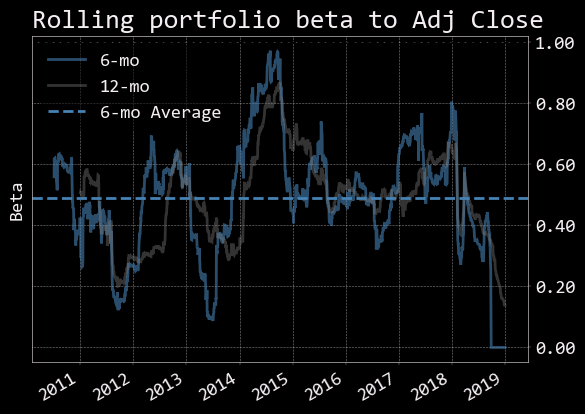

In [20]:
# Rolling Beta Plot
pf.plot_rolling_beta(bt_returns, benchmark_rets);

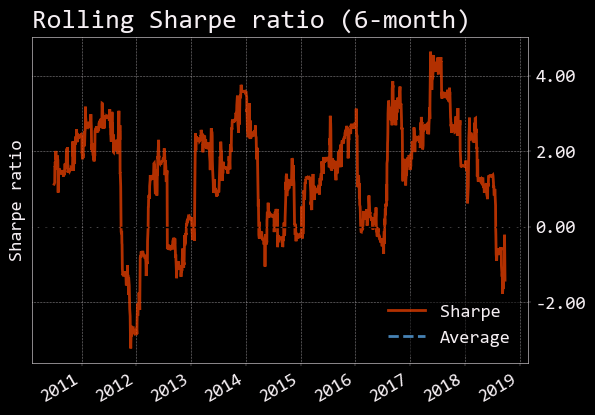

In [21]:
# Rolling Sharpe Ratio plot
pf.plot_rolling_sharpe(bt_returns);

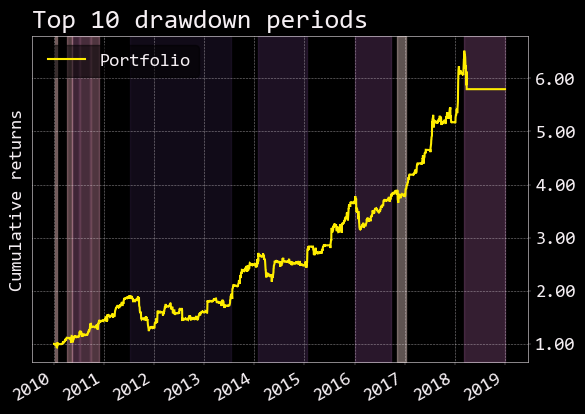

In [22]:
# Drawdown Plots
pf.plot_drawdown_periods(bt_returns);

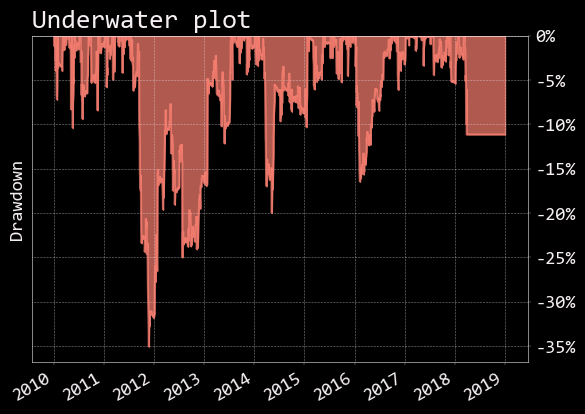

In [23]:
pf.plot_drawdown_underwater(bt_returns);

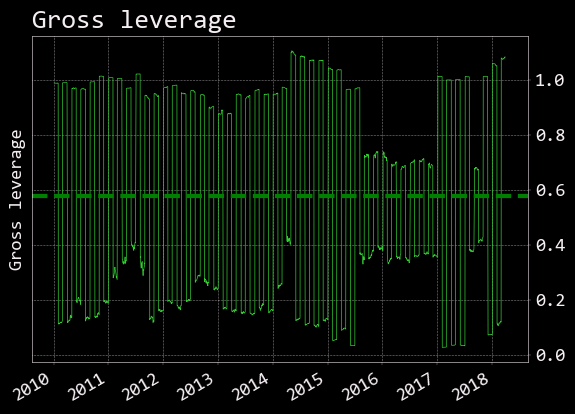

In [24]:
# Gross Leverage
pf.plot_gross_leverage(bt_returns, bt_positions);

Top 10 long positions of all time,max
sid,
NFLX,57.31%
AAPL,45.13%
FB,42.90%
AMZN,37.80%
GOOG,35.08%


Top 10 short positions of all time,max
sid,
NFLX,-19.54%
AAPL,-12.06%
FB,-10.17%
AMZN,-3.30%
GOOG,-1.69%


Top 10 positions of all time,max
sid,
NFLX,57.31%
AAPL,45.13%
FB,42.90%
AMZN,37.80%
GOOG,35.08%


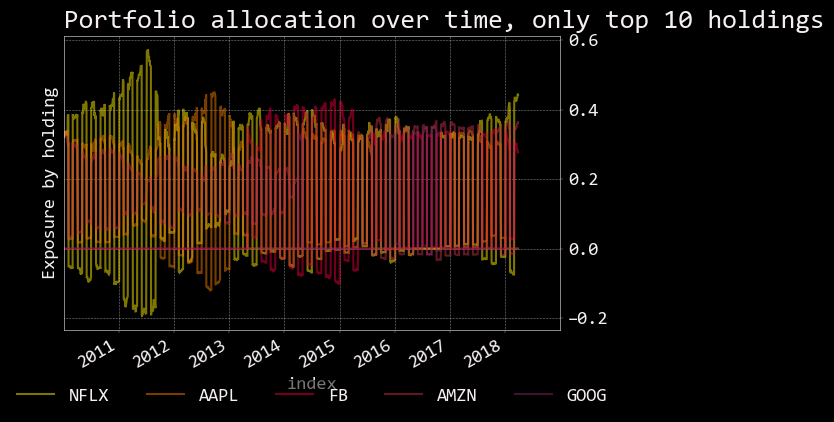

In [25]:
# Positions Plots
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,318.00,103.00,215.00
Percent profitable,0.54,0.31,0.65
Winning round_trips,172.00,32.00,140.00
Losing round_trips,146.00,71.00,75.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$217620.10,$-62773.56,$280393.66
Gross profit,$762584.33,$76501.22,$686083.10
Gross loss,$-544964.22,$-139274.78,$-405689.44
Profit factor,$1.40,$0.55,$1.69
Avg. trade net profit,$684.34,$-609.45,$1304.16
Avg. winning trade,$4433.63,$2390.66,$4900.59
Avg. losing trade,$-3732.63,$-1961.62,$-5409.19
Ratio Avg. Win:Avg. Loss,$1.19,$1.22,$0.91
Largest winning trade,$34473.60,$20461.74,$34473.60
Largest losing trade,$-76276.72,$-33888.96,$-76276.72


Duration stats,All trades,Short trades,Long trades
Avg duration,30 days 15:18:52.075471698,31 days 14:01:09.902912621,30 days 04:26:13.953488372
Median duration,30 days 00:00:00,29 days 00:00:00,30 days 00:00:00
Longest duration,519 days 01:00:00,519 days 01:00:00,34 days 00:00:00
Shortest duration,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.31%,0.06%,0.44%
Avg returns winning,1.82%,1.84%,1.82%
Avg returns losing,-1.50%,-1.58%,-1.45%
Median returns all round_trips,0.06%,-0.00%,0.11%
Median returns winning,0.84%,0.82%,0.85%
Median returns losing,-0.36%,-0.40%,-0.36%
Largest winning trade,17.14%,14.14%,17.14%
Largest losing trade,-26.35%,-26.35%,-23.94%


Symbol stats,AAPL,AMZN,FB,GOOG,NFLX
Avg returns all round_trips,0.57%,0.39%,-0.26%,1.20%,0.22%
Avg returns winning,2.34%,2.07%,1.56%,2.04%,1.18%
Avg returns losing,-1.93%,-1.82%,-1.85%,-0.47%,-0.81%
Median returns all round_trips,0.19%,0.15%,-0.00%,0.06%,0.01%
Median returns winning,1.03%,1.03%,0.29%,2.11%,0.78%
Median returns losing,-0.67%,-0.65%,-0.20%,-0.44%,-0.07%
Largest winning trade,14.14%,17.14%,9.82%,4.47%,5.68%
Largest losing trade,-26.35%,-9.17%,-23.94%,-0.95%,-5.58%


Profitability (PnL / PnL total) per name,
symbol,
AMZN,66.67%
AAPL,26.29%
FB,19.63%
GOOG,5.36%
NFLX,-17.95%


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

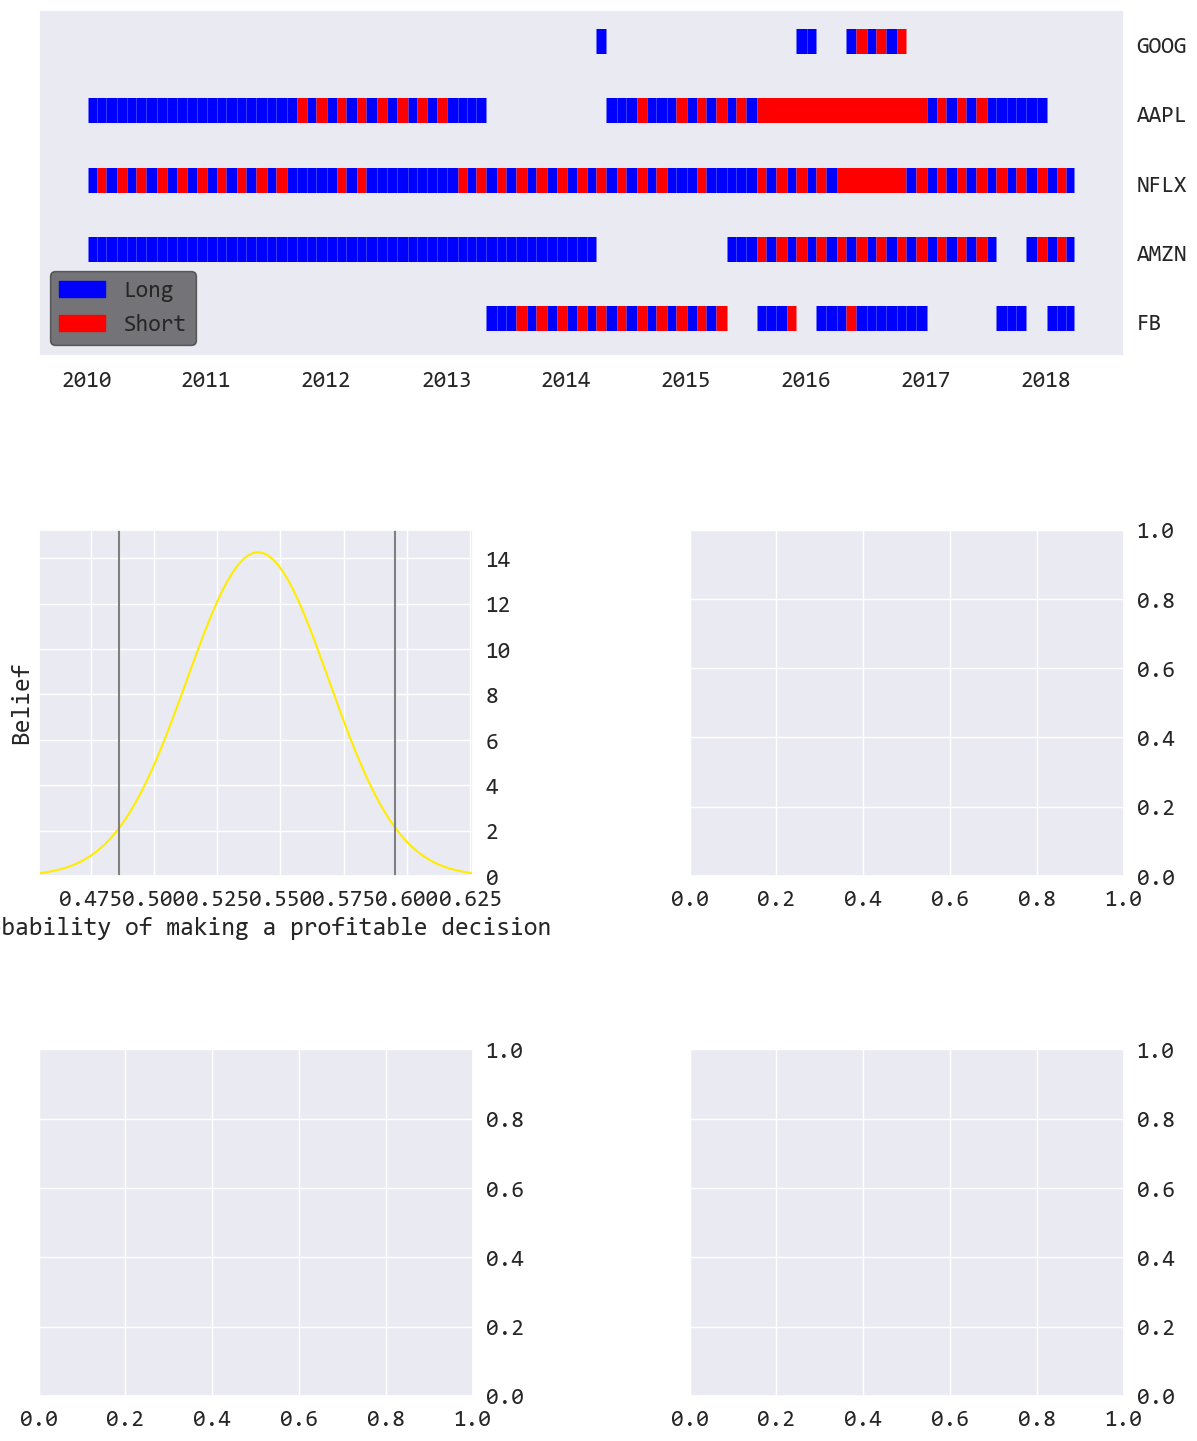

In [26]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions);